In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def m_m(x):
    return (x - x.min()) / (x.max() - x.min())

In [ ]:
plt.rcParams['figure.figsize']=(20,8)

# **Process**


In [ ]:
import zipfile
z = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/competitive-data-science-predict-future-sales.zip')
z.extractall()
z.namelist()

['item_categories.csv',
 'items.csv',
 'sales_train.csv',
 'sample_submission.csv',
 'shops.csv',
 'test.csv']

In [ ]:
sales = pd.read_csv('sales_train.csv')
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


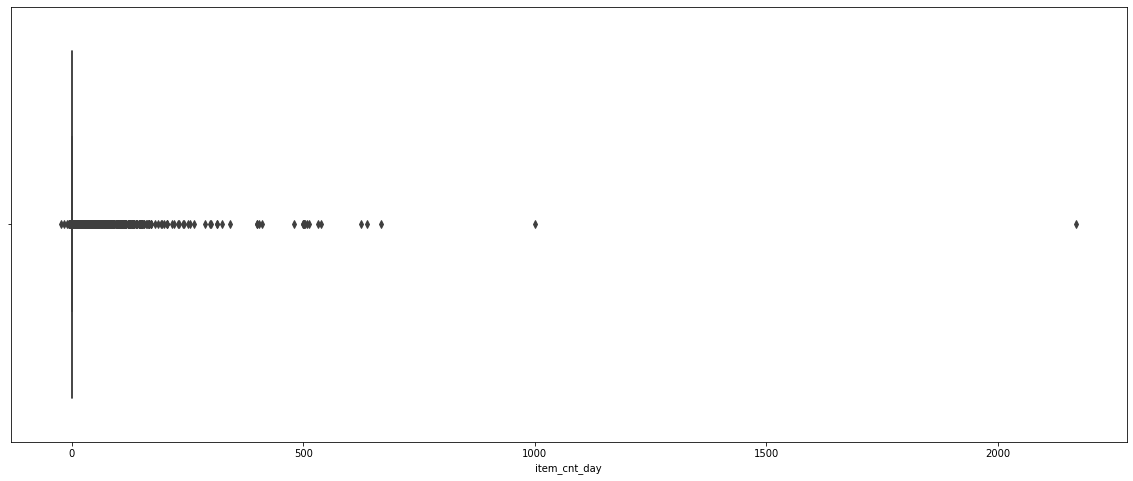

In [ ]:
sns.boxplot(x=sales['item_cnt_day'])

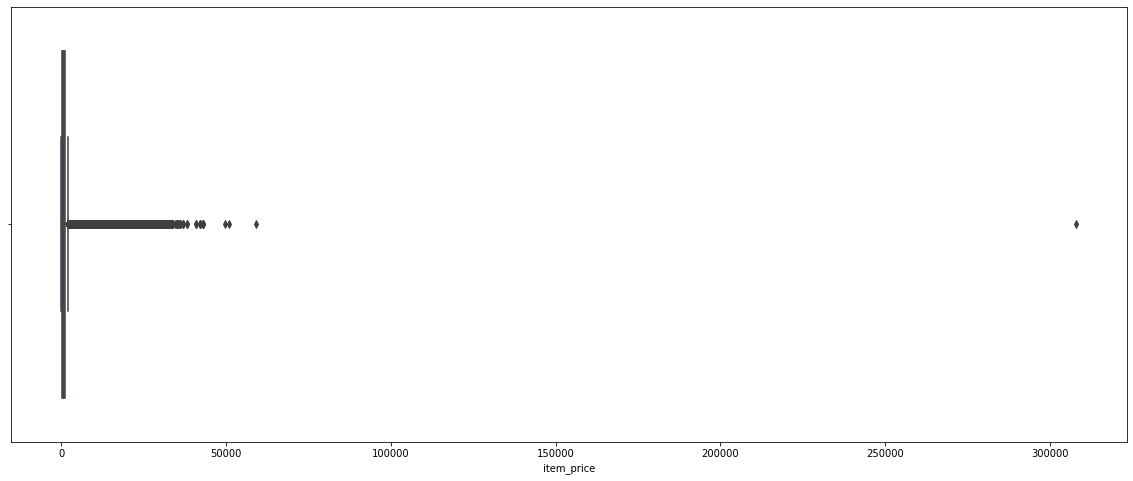

In [ ]:
sns.boxplot(x=sales['item_price'])

In [ ]:
sales = sales[sales['item_price'] < 5000]
sales = sales[sales['item_cnt_day'] < 800]
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,2902016.0,14.547435,9.424546,0.0,6.0,14.0,23.0,33.00
shop_id,2902016.0,33.014785,16.223954,0.0,22.0,31.0,47.0,59.00
item_id,2902016.0,10203.923048,6346.229392,0.0,4421.0,9355.0,15757.0,22169.00
item_price,2902016.0,745.103112,787.152770,-1.0,249.0,399.0,979.0,4999.24
item_cnt_day,2902016.0,1.240663,2.216300,-22.0,1.0,1.0,1.0,669.00


## **Pivot Table**

In [ ]:
test = pd.read_csv('test.csv')
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214200.0,107099.500000,61834.358168,0.0,53549.75,107099.5,160649.25,214199.0
shop_id,214200.0,31.642857,17.561933,2.0,16.00,34.5,47.00,59.0
item_id,214200.0,11019.398627,6252.644590,30.0,5381.50,11203.0,16071.50,22167.0


In [ ]:
data = sales.groupby(['date_block_num', 'item_id', 'shop_id'])['item_cnt_day'].sum().reset_index()
data['item_cnt_month'] = data['item_cnt_day']
data = data.drop('item_cnt_day', axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,1591567.0,14.647324,9.539553,0.0,6.0,14.0,23.0,33.0
item_id,1591567.0,10688.388204,6257.186275,0.0,5036.0,10498.0,16100.0,22169.0
shop_id,1591567.0,32.820424,16.534284,0.0,21.0,31.0,47.0,59.0
item_cnt_month,1591567.0,2.262189,8.452472,-22.0,1.0,1.0,2.0,1644.0


In [ ]:
data = pd.pivot_table(data, index=['item_id', 'shop_id'], columns='date_block_num', values='item_cnt_month', aggfunc=np.sum, fill_value=0)
data = data.reset_index()
data

date_block_num,item_id,shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,3,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418120,22168,12,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
418121,22168,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
418122,22168,42,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
418123,22168,43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
date_block_num,,,,,,,,
item_id,418125.0,11478.774845,6149.444762,0.0,6236.0,11611.0,16724.0,22169.0
shop_id,418125.0,31.439605,16.962319,0.0,18.0,30.0,46.0,59.0
0,418125.0,0.311943,1.519970,-13.0,0.0,0.0,0.0,169.0
1,418125.0,0.304165,1.608484,-4.0,0.0,0.0,0.0,130.0
2,418125.0,0.349757,2.064917,-2.0,0.0,0.0,0.0,259.0
3,418125.0,0.254802,1.368400,-2.0,0.0,0.0,0.0,175.0
4,418125.0,0.254567,2.024050,-1.0,0.0,0.0,0.0,504.0
5,418125.0,0.298191,3.342291,-1.0,0.0,0.0,0.0,766.0
6,418125.0,0.277914,2.755791,-2.0,0.0,0.0,0.0,799.0


In [ ]:
test = test[['item_id', 'shop_id']]
test = pd.merge(test, data, on=['item_id','shop_id'], how='left')
test = test.fillna(0)
test.head()

,item_id,shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,5037,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,5320,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5233,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,5232,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5268,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Encodings**

In [ ]:
items = pd.read_csv('items.csv')
items = items.set_index('item_id')['item_category_id']
items.head()

item_id
0    40
1    76
2    40
3    40
4    40
Name: item_category_id, dtype: int64

In [ ]:
category = pd.read_csv('item_categories.csv')
category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
sub = []
for x in category['item_category_name']:
    sub.append(x.split(' ')[0])
category['sub_cat_name'] = sub 
category.head()

,item_category_name,item_category_id,sub_cat_name
0,PC - Гарнитуры/Наушники,0,PC
1,Аксессуары - PS2,1,Аксессуары
2,Аксессуары - PS3,2,Аксессуары
3,Аксессуары - PS4,3,Аксессуары
4,Аксессуары - PSP,4,Аксессуары


In [ ]:
enc = {}
i = 0
for x in category['sub_cat_name']:
    if x not in enc:
        enc[x] = i
        i += 1

category['sub_cat_id'] = category['sub_cat_name'].map(enc)
category = category.set_index('item_category_id')['sub_cat_id']
category.head()

item_category_id
0    0
1    1
2    1
3    1
4    1
Name: sub_cat_id, dtype: int64

In [ ]:
test['category_id'] = test['item_id'].map(items)
test['sub_cat_id'] = test['category_id'].map(category)
test.head()

,item_id,shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,category_id,sub_cat_id
0,5037,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5
1,5320,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9
2,5233,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5
3,5232,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5
4,5268,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5


In [ ]:
test = test.drop(['item_id', 'shop_id'], axis =1)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,category_id,sub_cat_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5


In [ ]:
cat_feat = ['category_id', 'sub_cat_id']
for c in cat_feat:
    cums = test.groupby(c)[33].cumsum() - test[33]
    cumc = test.groupby(c).cumcount()
    test[c+'_mean'] = cums/cumc
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,category_id,sub_cat_id,category_id_mean,sub_cat_id_mean
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5,NaN,0.500000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,NaN,0.333333


In [ ]:
c_m = test.loc[test['category_id_mean'].isna() == False, 'category_id_mean'].mean()
c_s_m = test.loc[test['sub_cat_id_mean'].isna() == False, 'sub_cat_id_mean'].mean()
c_m, c_s_m

(0.30463153377400937, 0.3082526673352163)

In [ ]:
test['category_id_mean'] = test['category_id_mean'].fillna(c_m)
test['sub_cat_id_mean'] = test['sub_cat_id_mean'].fillna(c_s_m)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,category_id,sub_cat_id,category_id_mean,sub_cat_id_mean
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5,0.304632,0.308253
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.304632,0.308253
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5,0.304632,0.500000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,0.304632,0.333333


In [ ]:
sales['item_category_id'] = sales['item_id'].map(items)
category_p = sales.groupby(['item_category_id'])['item_price'].mean()
category_p.head()

item_category_id
0      87.800000
1     215.500000
2    2119.365027
3    2002.340289
4     554.696081
Name: item_price, dtype: float64

In [ ]:
sales['sub_cat_id'] = sales['item_category_id'].map(category)
sub_cat_p = sales.groupby(['sub_cat_id'])['item_price'].mean()
sub_cat_p.head()

sub_cat_id
0      87.800000
1    1839.608114
2    1345.441896
3     712.246641
4    2731.136341
Name: item_price, dtype: float64

In [ ]:
test['category_price'] = test['category_id'].map(category_p)
test['sub_cat_price'] = test['sub_cat_id'].map(sub_cat_p)
test['category_price'] = test['category_price'].fillna(category_p.mean())
test['sub_cat_price'] = test['sub_cat_price'].fillna(sub_cat_p.mean())
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,category_id,sub_cat_id,category_id_mean,sub_cat_id_mean,category_price,sub_cat_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5,0.304632,0.308253,1505.534278,1100.428753
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.304632,0.308253,286.209370,354.504568
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5,0.000000,0.000000,1505.534278,1100.428753
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5,0.304632,0.500000,1470.959494,1100.428753
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,0.304632,0.333333,2693.714838,1100.428753


## **Build train-validation data**

In [ ]:
x = test.drop(33, axis=1)
y = test.loc[: , 33]
x.head()

(214200, 38)

In [ ]:
x_test = test.drop([0,1], axis=1)

cc = {}
for i in range(33):
    cc[i+1] = i

x_test = x_test.rename(columns=cc)
x_test.columns

Index([                 0,                  1,                  2,
                        3,                  4,                  5,
                        6,                  7,                  8,
                        9,                 10,                 11,
                       12,                 13,                 14,
                       15,                 16,                 17,
                       18,                 19,                 20,
                       21,                 22,                 23,
                       24,                 25,                 26,
                       27,                 28,                 29,
                       30,                 31,      'category_id',
             'sub_cat_id', 'category_id_mean',  'sub_cat_id_mean',
         'category_price',    'sub_cat_price'],
      dtype='object')

In [ ]:
lags = [i for i in range(33)]

def feating(x):
    x['lag_mean'] = x.loc[:,lags].mean(axis=1)
    x['lag_min'] = x.loc[:,lags].min(axis=1)
    x['lag_max'] = x.loc[:,lags].max(axis=1)
    x['lag_std'] = x.loc[:,lags].std(axis=1)

    return x

x_train = feating(x_train)
x_val = feating(x_val)
x_test = feating(x_test)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,category_id,sub_cat_id,category_id_mean,sub_cat_id_mean,category_price,sub_cat_price,lag_mean,lag_min,lag_max,lag_std
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5,0.304632,0.308253,1505.534278,1100.428753,0.40625,0.0,3.0,0.756024
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.304632,0.308253,286.209370,354.504568,0.00000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5,0.000000,0.000000,1505.534278,1100.428753,0.31250,0.0,3.0,0.820602
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5,0.304632,0.500000,1470.959494,1100.428753,0.03125,0.0,1.0,0.176777
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,0.304632,0.333333,2693.714838,1100.428753,0.00000,0.0,0.0,0.000000


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(4, shuffle=True).split(x_train)
ids = [(i, j) for i,j in kf]
ids

[(array([     1,      2,      3, ..., 214194, 214195, 214199]),
  array([     0,      6,     16, ..., 214196, 214197, 214198])),
 (array([     0,      1,      3, ..., 214197, 214198, 214199]),
  array([     2,      4,      7, ..., 214190, 214194, 214195])),
 (array([     0,      2,      4, ..., 214196, 214197, 214198]),
  array([     1,      3,      9, ..., 214184, 214191, 214199])),
 (array([     0,      1,      2, ..., 214197, 214198, 214199]),
  array([     5,      8,     10, ..., 214186, 214192, 214193]))]

In [ ]:
l1 = pd.DataFrame()
l2 = pd.DataFrame()
l3 = pd.DataFrame()
l4 = pd.DataFrame()

l1t = pd.DataFrame()
l2t = pd.DataFrame()
l3t = pd.DataFrame()
l4t = pd.DataFrame()

l_test = pd.DataFrame()

In [ ]:
lll = [l1, l2, l3, l4]
lll_test = [l1t, l2t, l3t, l4t]

# **CatBoostRegressor**

In [ ]:
pip install catboost

     |████████████████████████████████| 65.7MB 56kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
c_model = CatBoostRegressor(n_estimators=10000, learning_rate=0.05, max_depth=13, reg_lambda=5, objective='RMSE')

i,j =ids[0]

x_train = x.iloc[i]
y_train = y.iloc[i]
x_val = x.iloc[j]
y_val = y.iloc[j]

c_model.fit(x_train, y_train, plot=True, cat_features=cat_feat, eval_set=(x_val, y_val), early_stopping_rounds=30)

k = 0

for i, j in ids[1:]:
    x_train = x.iloc[i]
    y_train = y.iloc[i]
    x_val = x.iloc[j]
    y_val = y.iloc[j]

    c_model.fit(x_train, y_train, plot=True, cat_features=cat_feat, eval_set=(x_val, y_val), early_stopping_rounds=30, init_model=c_model)
    k +=1

In [ ]:
c_model = CatBoostRegressor(n_estimators=10000, learning_rate=0.05, max_depth=13, reg_lambda=5, objective='RMSE')
c_model.fit(x_train, y_train, plot=True, cat_features=cat_feat, eval_set=(x_val, y_val), early_stopping_rounds=30, verbose=10)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4508660	test: 2.6590266	best: 2.6590266 (0)	total: 526ms	remaining: 1h 27m 39s
10:	learn: 2.1083748	test: 2.4527849	best: 2.4527849 (10)	total: 5.43s	remaining: 1h 22m 15s
20:	learn: 1.8850560	test: 2.3381515	best: 2.3381515 (20)	total: 10.6s	remaining: 1h 23m 50s
30:	learn: 1.7144117	test: 2.2499916	best: 2.2499916 (30)	total: 16s	remaining: 1h 25m 57s
40:	learn: 1.5914462	test: 2.1851645	best: 2.1851645 (40)	total: 21.3s	remaining: 1h 26m 12s
50:	learn: 1.5058151	test: 2.1510445	best: 2.1510445 (50)	total: 26.8s	remaining: 1h 27m
60:	learn: 1.4411398	test: 2.1135139	best: 2.1135139 (60)	total: 32.3s	remaining: 1h 27m 42s
70:	learn: 1.4051887	test: 2.1001580	best: 2.1001580 (70)	total: 37.2s	remaining: 1h 26m 42s
80:	learn: 1.3631117	test: 2.0752306	best: 2.0752306 (80)	total: 42.3s	remaining: 1h 26m 24s
90:	learn: 1.3380546	test: 2.0582081	best: 2.0582081 (90)	total: 46.8s	remaining: 1h 24m 53s
100:	learn: 1.3151159	test: 2.0435425	best: 2.0435425 (100)	total: 51.6s	remai

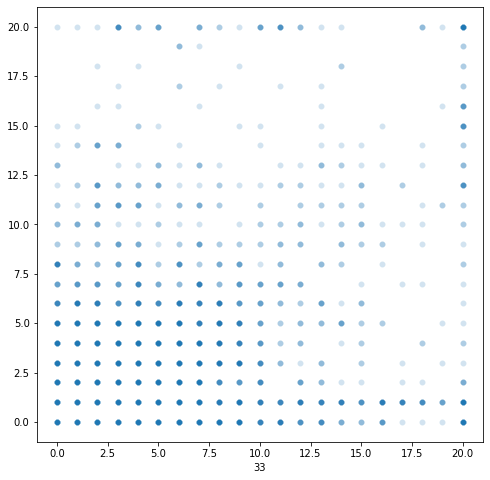

In [ ]:
pp = c_model.predict(x_val)
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=y_val.clip(0,20), y=pp.clip(0,20).round(), alpha=0.2)

In [ ]:
mean_squared_error(y, pp), mean_squared_error(y.clip(0,20), pp.clip(0,20))

NameError: ignored

In [ ]:
mean_squared_error(y_val, pp), mean_squared_error(y_val.clip(0,20), pp.clip(0,20))

(5.3197986974914695, 0.724271491392352)

In [ ]:
cc = {}
for i in range(33):
    cc[i+1] = i
x_test = x_test.rename(columns=cc)
x_test.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,    'category_id',     'sub_cat_id',  'category_id_m',
         'sub_cat_id_m', 'category_price',  'sub_cat_price'],
      dtype='object')

In [ ]:
pred = c_model.predict(x_test).clip(0,20)
ans = pd.DataFrame({'ID':[i for i in range(len(x_test))], 'item_cnt_month':pred}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.251626
std,0.729103
min,0.000000
25%,0.063333
50%,0.098976
75%,0.236752
max,20.000000


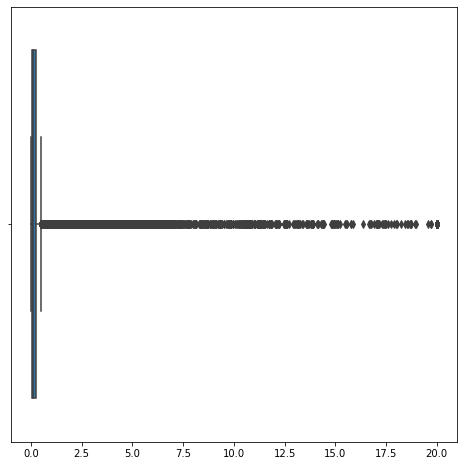

In [ ]:
sns.boxplot(x=pred)

In [ ]:
(pred**2).mean()

0.5949046417757866

In [ ]:
ans.to_csv('compans_cat_past.csv')
from google.colab import files
files.download('compans_cat_past.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Level 1**

# **CatBoost Regressor**

In [ ]:
pip install catboost

     |████████████████████████████████| 65.7MB 62kB/s 


In [ ]:
cc = {}
for i in range(33):
    cc[i+1] = i
x_test = x_test.rename(columns=cc)
x_test.columns

Index([               0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11,
                     12,               13,               14,               15,
                     16,               17,               18,               19,
                     20,               21,               22,               23,
                     24,               25,               26,               27,
                     28,               29,               30,               31,
                     32,    'category_id',     'sub_cat_id',  'category_id_m',
         'sub_cat_id_m', 'category_price',  'sub_cat_price'],
      dtype='object')

In [ ]:
from catboost import CatBoostRegressor

k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y.iloc[i]
    y_val = y.iloc[j]

    x_t = x_test.iloc[j]

    c_model = CatBoostRegressor(objective='RMSE', learning_rate=0.03, reg_lambda=4, n_estimators=10000)
    c_model.fit(x_train, y_train, verbose=True, early_stopping_rounds=50, cat_features=cat_feat, eval_set=(x_val, y_val))

    lll[k]['catboost_r'] = c_model.predict(x_val)
    lll_test[k]['catboost_r'] = c_model.predict(x_t)

    print(k+1)
    print(lll[k].head())
    print(lll_test[k].head())

    k += 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
268:	learn: 1.3396551	test: 1.2046145	best: 1.2046145 (268)	total: 16.2s	remaining: 9m 45s
269:	learn: 1.3380241	test: 1.2028651	best: 1.2028651 (269)	total: 16.3s	remaining: 9m 45s
270:	learn: 1.3377104	test: 1.2023567	best: 1.2023567 (270)	total: 16.3s	remaining: 9m 45s
271:	learn: 1.3371805	test: 1.2013843	best: 1.2013843 (271)	total: 16.4s	remaining: 9m 46s
272:	learn: 1.3368716	test: 1.2008419	best: 1.2008419 (272)	total: 16.5s	remaining: 9m 46s
273:	learn: 1.3365929	test: 1.2003068	best: 1.2003068 (273)	total: 16.5s	remaining: 9m 46s
274:	learn: 1.3350791	test: 1.1990315	best: 1.1990315 (274)	total: 16.6s	remaining: 9m 46s
275:	learn: 1.3348076	test: 1.1984622	best: 1.1984622 (275)	total: 16.6s	remaining: 9m 45s
276:	learn: 1.3345013	test: 1.1979571	best: 1.1979571 (276)	total: 16.7s	remaining: 9m 45s
277:	learn: 1.3340729	test: 1.1974360	best: 1.1974360 (277)	total: 16.7s	remaining: 9m 45s
278:	learn: 1.3337451	t

In [ ]:
l4t.head()

,catboost_r
0,1.072265
1,0.848000
2,0.583790
3,0.400824
4,0.642755


In [ ]:
pp = c_model.predict(x_val)
mean_squared_error(y_val.clip(0,20), pp.clip(0,20))

0.6739680357832416

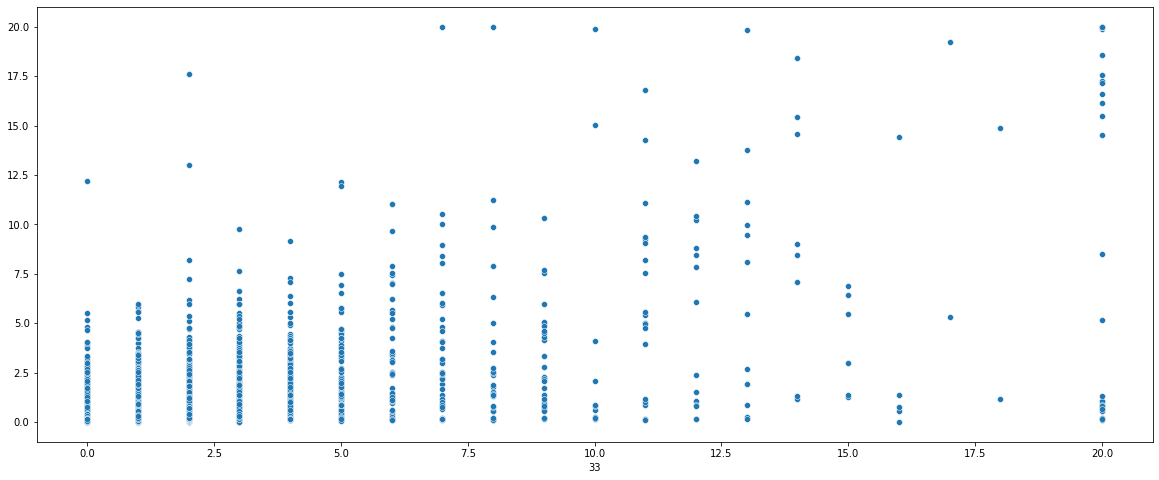

In [ ]:
sns.scatterplot(x=y_val.clip(0,20), y=pp.clip(0,20))

In [ ]:
pred = c_model.predict(x_test).clip(0, 20)
ans = pd.DataFrame({'ID':[i for i in range(len(test))], 'item_cnt_month':pred}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.261123
std,0.707735
min,0.000000
25%,0.077141
50%,0.132362
75%,0.220511
max,20.000000


In [ ]:
(pp.clip(0,20)**2).mean(), (pred**2).mean()

(0.6264112438980359, 0.5690725030919561)

In [ ]:
ans.to_csv('compans_pivot_catboost.csv')
files.download('compans_pivot_catboost.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **CatBoost Classifier**

In [ ]:
y_c = (y > 0).astype(np.int8)
y_c.describe()

count    214200.000000
mean          0.130789
std           0.337170
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: 33, dtype: float64

In [ ]:
from catboost import CatBoostClassifier

k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y_c.iloc[i]
    y_val = y_c.iloc[j]

    x_t = x_test.iloc[j]

    c_model = CatBoostClassifier(objective='Logloss', learning_rate=0.03, reg_lambda=4, n_estimators=10000)
    c_model.fit(x_train, y_train, verbose=True, early_stopping_rounds=50, cat_features=cat_feat, eval_set=(x_val, y_val))

    lll[k]['catboost_c'] = c_model.predict(x_val)
    lll_test[k]['catboost_c'] = c_model.predict(x_t)

    lll[k]['catboost_pr'] = c_model.predict_proba(x_val)[:,1]
    lll_test[k]['catboost_pr'] = c_model.predict_proba(x_t)[:,1]

    print(k+1)
    print(lll[k].head())
    print(lll_test[k].head())

    k += 1

Se truncaron las últimas líneas 5000 del resultado de transmisión.
1081:	learn: 0.2856337	test: 0.3007237	best: 0.3007237 (1081)	total: 2m 1s	remaining: 16m 44s
1082:	learn: 0.2856225	test: 0.3007231	best: 0.3007231 (1082)	total: 2m 1s	remaining: 16m 44s
1083:	learn: 0.2856131	test: 0.3007209	best: 0.3007209 (1083)	total: 2m 2s	remaining: 16m 43s
1084:	learn: 0.2855997	test: 0.3007186	best: 0.3007186 (1084)	total: 2m 2s	remaining: 16m 43s
1085:	learn: 0.2855877	test: 0.3007174	best: 0.3007174 (1085)	total: 2m 2s	remaining: 16m 43s
1086:	learn: 0.2855812	test: 0.3007205	best: 0.3007174 (1085)	total: 2m 2s	remaining: 16m 43s
1087:	learn: 0.2855681	test: 0.3007217	best: 0.3007174 (1085)	total: 2m 2s	remaining: 16m 43s
1088:	learn: 0.2855586	test: 0.3007261	best: 0.3007174 (1085)	total: 2m 2s	remaining: 16m 43s
1089:	learn: 0.2855570	test: 0.3007272	best: 0.3007174 (1085)	total: 2m 2s	remaining: 16m 43s
1090:	learn: 0.2855532	test: 0.3007239	best: 0.3007174 (1085)	total: 2m 2s	remaining: 1

In [ ]:
l4t.describe()

,catboost_r,catboost_c,catboost_pr
count,53550.000000,53550.000000,53550.000000
mean,0.271317,0.047320,0.131814
std,1.320215,0.212325,0.164426
min,-0.054239,0.000000,0.000862
25%,0.070381,0.000000,0.039012
50%,0.126879,0.000000,0.082078
75%,0.216806,0.000000,0.150010
max,162.120427,1.000000,0.999869


# **LGBM**

In [ ]:
x_test = x_test.drop(cat_feat, axis=1)
x = x.drop(cat_feat, axis=1)

In [ ]:
import lightgbm as lgb

k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y.iloc[i]
    y_val = y.iloc[j]

    x_t = x_test.iloc[j]

    train = lgb.Dataset(x_train, y_train)
    val = lgb.Dataset(x_val, y_val)
    params = {'learning_rate':0.02, 'max_depth':11, 'num_leaves':40, 'reg_alpha':0.1, 'reg_lambda':0.12, 'min_child_weight':40, 'n_estimators' :100000,
            'objective':'mse', 'metric':'mse', 'min_split_gain':0.02, 'random_state':0}
    l_model = lgb.train(params, train, valid_sets=val, verbose_eval=100, early_stopping_rounds=100)

    lll[k]['lightgbm_r'] = l_model.predict(x_val)
    lll_test[k]['lightgbm_r'] = l_model.predict(x_t)


    print(k+1)
    print(lll[k].head())
    print(lll_test[k].head())

    k += 1

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.28132
[200]	valid_0's l2: 3.91671
[300]	valid_0's l2: 3.69047
[400]	valid_0's l2: 3.51799
[500]	valid_0's l2: 3.39857
[600]	valid_0's l2: 3.289
[700]	valid_0's l2: 3.20704
[800]	valid_0's l2: 3.13946
[900]	valid_0's l2: 3.07611
[1000]	valid_0's l2: 3.01229
[1100]	valid_0's l2: 2.98453
[1200]	valid_0's l2: 2.96756
[1300]	valid_0's l2: 2.93256
[1400]	valid_0's l2: 2.91155
[1500]	valid_0's l2: 2.89457
[1600]	valid_0's l2: 2.87991
[1700]	valid_0's l2: 2.86496
[1800]	valid_0's l2: 2.85273
[1900]	valid_0's l2: 2.84751
Early stopping, best iteration is:
[1844]	valid_0's l2: 2.84261
1
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.904606           1     0.519386    1.320667
1    0.402813           0     0.098883    0.837790
2    0.885869           1     0.634759    1.140803
3    0.040615           0     0.016320   -3.246447
4    1.738619           1     0.964493    2.126080
   catboost_r  catboost_c

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 4.0314
[200]	valid_0's l2: 3.71456
[300]	valid_0's l2: 3.53143
[400]	valid_0's l2: 3.38587
[500]	valid_0's l2: 3.29062
[600]	valid_0's l2: 3.23561
[700]	valid_0's l2: 3.20555
[800]	valid_0's l2: 3.19242
[900]	valid_0's l2: 3.19311
Early stopping, best iteration is:
[869]	valid_0's l2: 3.19061
2
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.406579           0     0.077177    0.322055
1    0.014221           0     0.013696   -0.583102
2    0.364748           1     0.504882    0.604739
3    1.389524           1     0.813544    1.469122
4    0.938564           0     0.244217    0.255393
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.406579           0     0.077177    0.322055
1    0.010839           0     0.010294   -0.584751
2    0.257756           0     0.292653    0.385598
3    1.298067           1     0.774827    1.571432
4    0.711975           1     0.524801    0.143829


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 1.71597
[200]	valid_0's l2: 1.71674
Early stopping, best iteration is:
[134]	valid_0's l2: 1.68421
3
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.567992           0     0.377065    0.570339
1    1.009574           1     0.765259    0.967530
2    0.165679           0     0.171649    0.198141
3    3.203972           1     0.886155   -0.160110
4    0.105189           0     0.059643    0.126852
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.442340           0     0.282669    0.501753
1    0.711758           1     0.619652    0.618670
2    0.120044           0     0.122643    0.163266
3    1.867784           1     0.903727   -0.491710
4    0.105189           0     0.059643    0.126852


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 9.70131
[200]	valid_0's l2: 9.27374
[300]	valid_0's l2: 9.113
[400]	valid_0's l2: 9.02828
[500]	valid_0's l2: 8.93689
[600]	valid_0's l2: 8.83808
[700]	valid_0's l2: 8.71678
[800]	valid_0's l2: 8.61093
[900]	valid_0's l2: 8.5344
[1000]	valid_0's l2: 8.48312
[1100]	valid_0's l2: 8.43779
[1200]	valid_0's l2: 8.41542
[1300]	valid_0's l2: 8.4009
[1400]	valid_0's l2: 8.38907
[1500]	valid_0's l2: 8.38061
[1600]	valid_0's l2: 8.3776
Early stopping, best iteration is:
[1581]	valid_0's l2: 8.37701
4
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.146252           0     0.098480    0.138171
1    0.407967           0     0.381354    0.204947
2    0.112205           0     0.086810    0.118371
3    1.026023           0     0.155142    0.772298
4    2.386412           1     0.786265    2.972073
   catboost_r  catboost_c  catboost_pr  lightgbm_r
0    0.146252           0     0.098480    0.138171
1    0.326873

In [ ]:
l4t.describe()

,catboost_r,catboost_c,catboost_pr,lightgbm
count,53550.000000,53550.000000,53550.000000,53550.000000
mean,0.271317,0.047320,0.131814,0.274657
std,1.320215,0.212325,0.164426,1.511424
min,-0.054239,0.000000,0.000862,-23.401467
25%,0.070381,0.000000,0.039012,0.075207
50%,0.126879,0.000000,0.082078,0.125821
75%,0.216806,0.000000,0.150010,0.211524
max,162.120427,1.000000,0.999869,149.316892


In [ ]:
pred = model.predict(x_test).clip(0, 20)
ans = pd.DataFrame({'ID':[i for i in range(len(test))], 'item_cnt_month':pred}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.267083
std,0.804138
min,0.000000
25%,0.047839
50%,0.131750
75%,0.206690
max,20.000000


In [ ]:
(pred **2).mean()

0.5551155890749377

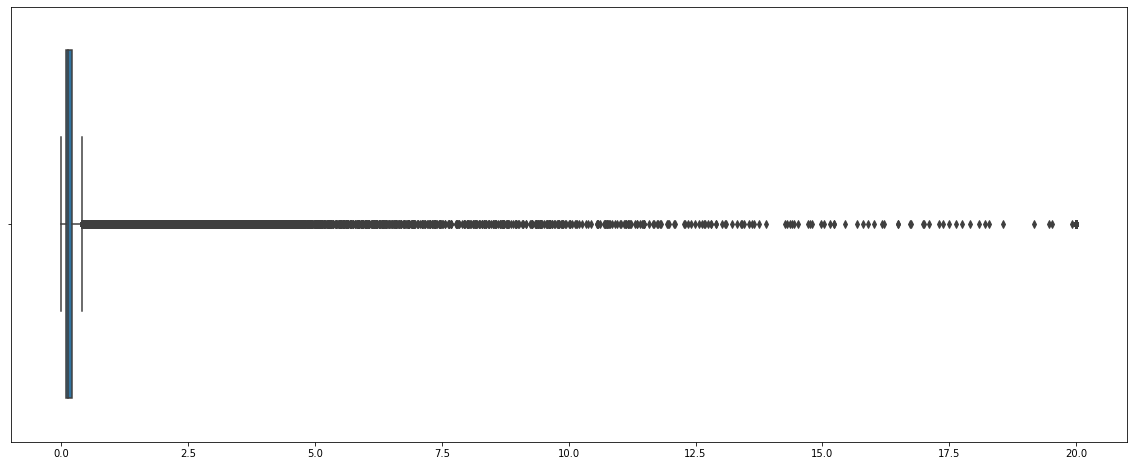

In [ ]:
sns.boxplot(x=pred)

In [ ]:
from google.colab import files
ans.to_csv('compans_pivot_cat.csv')
files.download('compans_pivot_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LGBM Classifier**

In [ ]:
k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y_c.iloc[i]
    y_val = y_c.iloc[j]

    x_t = x_test.iloc[j]

    train = lgb.Dataset(x_train, y_train)
    val = lgb.Dataset(x_val, y_val)
    params = {'learning_rate':0.02, 'max_depth':11, 'num_leaves':40, 'reg_alpha':0.1, 'reg_lambda':0.12, 'min_child_weight':40,
              'n_estimators' :100000,'objective':'binary', 'metric':'auc', 'min_split_gain':0.02, 'random_state':0}
    l_model = lgb.train(params, train, valid_sets=val, verbose_eval=100, early_stopping_rounds=100)

    lll[k]['lightgbm_c'] = l_model.predict(x_val)
    lll_test[k]['lightgbm_c'] = l_model.predict(x_t)


    print(k+1)
    print(lll[k].head())
    print(lll_test[k].head())

    k += 1

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.814554
[200]	valid_0's auc: 0.817102
[300]	valid_0's auc: 0.818194
[400]	valid_0's auc: 0.819364
[500]	valid_0's auc: 0.820069
[600]	valid_0's auc: 0.820475
[700]	valid_0's auc: 0.820722
[800]	valid_0's auc: 0.820875
[900]	valid_0's auc: 0.820962
[1000]	valid_0's auc: 0.821196
[1100]	valid_0's auc: 0.821407
[1200]	valid_0's auc: 0.821569
[1300]	valid_0's auc: 0.821748
[1400]	valid_0's auc: 0.821896
[1500]	valid_0's auc: 0.821988
[1600]	valid_0's auc: 0.822014
[1700]	valid_0's auc: 0.822144
[1800]	valid_0's auc: 0.822175
[1900]	valid_0's auc: 0.822224
[2000]	valid_0's auc: 0.822249
[2100]	valid_0's auc: 0.822247
Early stopping, best iteration is:
[2096]	valid_0's auc: 0.822267
1
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c
0    0.904606           1     0.519386    1.320667    0.108191
1    0.402813           0     0.098883    0.837790    0.121132
2    0.885869           1     0.634759

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.814929
[200]	valid_0's auc: 0.817084
[300]	valid_0's auc: 0.818279
[400]	valid_0's auc: 0.819018
[500]	valid_0's auc: 0.81968
[600]	valid_0's auc: 0.820075
[700]	valid_0's auc: 0.820372
[800]	valid_0's auc: 0.820752
[900]	valid_0's auc: 0.820919
[1000]	valid_0's auc: 0.821093
[1100]	valid_0's auc: 0.821229
[1200]	valid_0's auc: 0.821366
[1300]	valid_0's auc: 0.821412
[1400]	valid_0's auc: 0.821512
[1500]	valid_0's auc: 0.821732
[1600]	valid_0's auc: 0.821955
[1700]	valid_0's auc: 0.822301
[1800]	valid_0's auc: 0.822392
[1900]	valid_0's auc: 0.82246
[2000]	valid_0's auc: 0.822559
[2100]	valid_0's auc: 0.822617
[2200]	valid_0's auc: 0.822656
[2300]	valid_0's auc: 0.822706
[2400]	valid_0's auc: 0.822726
[2500]	valid_0's auc: 0.822756
[2600]	valid_0's auc: 0.82277
Early stopping, best iteration is:
[2547]	valid_0's auc: 0.822791
2
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c
0    0.40657

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.818549
[200]	valid_0's auc: 0.82032
[300]	valid_0's auc: 0.821675
[400]	valid_0's auc: 0.822712
[500]	valid_0's auc: 0.823115
[600]	valid_0's auc: 0.823465
[700]	valid_0's auc: 0.823776
[800]	valid_0's auc: 0.824162
[900]	valid_0's auc: 0.824523
[1000]	valid_0's auc: 0.824742
[1100]	valid_0's auc: 0.824917
[1200]	valid_0's auc: 0.8251
[1300]	valid_0's auc: 0.825367
[1400]	valid_0's auc: 0.825524
[1500]	valid_0's auc: 0.825597
[1600]	valid_0's auc: 0.825683
[1700]	valid_0's auc: 0.825729
[1800]	valid_0's auc: 0.825745
[1900]	valid_0's auc: 0.825834
[2000]	valid_0's auc: 0.825847
[2100]	valid_0's auc: 0.825937
Early stopping, best iteration is:
[2081]	valid_0's auc: 0.825953
3
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c
0    0.567992           0     0.377065    0.570339    0.271520
1    1.009574           1     0.765259    0.967530    0.193471
2    0.165679           0     0.171649   

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.816368
[200]	valid_0's auc: 0.81863
[300]	valid_0's auc: 0.819679
[400]	valid_0's auc: 0.820347
[500]	valid_0's auc: 0.821004
[600]	valid_0's auc: 0.821416
[700]	valid_0's auc: 0.82169
[800]	valid_0's auc: 0.82184
[900]	valid_0's auc: 0.822207
[1000]	valid_0's auc: 0.822404
[1100]	valid_0's auc: 0.822539
[1200]	valid_0's auc: 0.822765
[1300]	valid_0's auc: 0.822911
[1400]	valid_0's auc: 0.823021
[1500]	valid_0's auc: 0.823283
[1600]	valid_0's auc: 0.823514
[1700]	valid_0's auc: 0.82364
[1800]	valid_0's auc: 0.823743
[1900]	valid_0's auc: 0.823845
[2000]	valid_0's auc: 0.823875
[2100]	valid_0's auc: 0.823882
Early stopping, best iteration is:
[2036]	valid_0's auc: 0.823917
4
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c
0    0.146252           0     0.098480    0.138171    0.061008
1    0.407967           0     0.381354    0.204947    0.132725
2    0.112205           0     0.086810    

# **SVM Regressor**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
c = x.columns
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x), columns=c)
x_test = pd.DataFrame(scaler.transform(x_test), columns = c)
x_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,category_id_m,sub_cat_id_m,category_price,sub_cat_price
0,-0.976608,-0.983051,-0.992308,-0.986842,-0.99604,-0.997392,-0.9975,-0.995134,-0.997897,-0.997957,-0.991944,-0.998469,-0.997778,-0.997877,-0.997426,-0.996656,-0.996683,-0.997409,-0.996454,-0.993243,-0.996875,-0.993701,-0.992238,-0.995041,-0.997312,-0.992248,-0.977273,-0.995086,-0.994616,-0.991011,-0.983437,-0.990847,-0.995781,-0.996326,-0.966675,-0.174295,-0.233825
1,-0.976608,-0.983051,-0.992308,-0.986842,-0.99604,-0.997392,-0.9975,-0.995134,-0.997897,-0.997957,-0.991944,-0.998469,-0.997778,-0.997877,-0.997426,-0.996656,-0.996683,-0.997409,-0.996454,-0.996622,-0.996875,-0.996850,-0.997413,-0.998347,-0.997312,-0.992248,-0.977273,-0.997543,-0.997308,-0.995506,-0.995859,-0.995423,-0.995781,-0.996326,-0.966675,-0.845227,-0.798206
2,-0.976608,-0.983051,-0.992308,-0.986842,-0.99604,-0.997392,-0.9975,-0.995134,-0.997897,-0.997957,-0.991944,-0.998469,-0.997778,-0.997877,-0.997426,-0.996656,-0.996683,-0.997409,-0.996454,-0.996622,-0.996875,-0.996850,-0.997413,-0.998347,-0.997312,-0.992248,-0.977273,-0.990172,-0.991925,-0.995506,-0.991718,-0.981693,-0.991561,-1.000000,-1.000000,-0.174295,-0.233825
3,-0.976608,-0.983051,-0.992308,-0.986842,-0.99604,-0.997392,-0.9975,-0.995134,-0.997897,-0.997957,-0.991944,-0.998469,-0.997778,-0.997877,-0.997426,-0.996656,-0.996683,-0.997409,-0.996454,-0.996622,-0.996875,-0.996850,-0.997413,-0.998347,-0.997312,-0.992248,-0.977273,-0.997543,-0.997308,-0.995506,-0.991718,-0.995423,-0.995781,-0.996326,-0.945946,-0.193319,-0.233825
4,-0.976608,-0.983051,-0.992308,-0.986842,-0.99604,-0.997392,-0.9975,-0.995134,-0.997897,-0.997957,-0.991944,-0.998469,-0.997778,-0.997877,-0.997426,-0.996656,-0.996683,-0.997409,-0.996454,-0.996622,-0.996875,-0.996850,-0.997413,-0.998347,-0.997312,-0.992248,-0.977273,-0.997543,-0.997308,-0.995506,-0.995859,-0.995423,-0.995781,-0.996326,-0.963964,0.479501,-0.233825


In [ ]:
from sklearn.svm import LinearSVR

k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y.iloc[i]
    y_val = y.iloc[j]

    x_t = x_test.iloc[j]

    svr = LinearSVR(C=2.0, epsilon=0.2, max_iter=20000)
    svr.fit(x_train, y_train)

    lll[k]['svr'] = svr.predict(x_val)
    lll_test[k]['svr'] = svr.predict(x_t)

    print(k+1)
    print(lll[k].head())
    print(lll_test[k].head())

    k += 1

1
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c       svr
0    0.904606           1     0.519386    1.320667    0.108191  0.361409
1    0.402813           0     0.098883    0.837790    0.121132  0.100489
2    0.885869           1     0.634759    1.140803    0.741265  0.541224
3    0.040615           0     0.016320   -3.246447    0.004031  0.127611
4    1.738619           1     0.964493    2.126080    0.959209  0.552490
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c       svr
0    0.787638           1     0.632153    0.961389    0.150879  0.423182
1    0.402813           0     0.098883    0.837790    0.121132  0.100489
2    2.331037           1     0.773483    2.638647    0.913954  0.979448
3    0.044544           0     0.015060   -3.275216    0.003111  0.122095
4    1.171086           1     0.798343    0.874011    0.843570  0.319908
2
   catboost_r  catboost_c  catboost_pr  lightgbm_r  lightgbm_c       svr
0    0.406579           0     0.077177    0.322

# **SVM Classifier**

In [ ]:
from sklearn.svm import LinearSVC

k = 0

for (i, j) in ids:
    x_train = x.iloc[i]
    x_val = x.iloc[j]
    y_train = y_c.iloc[i]
    y_val = y_c.iloc[j]

    x_t = x_test.iloc[j]

    svc = LinearSVC(C=2.0, max_iter=5000)
    svc.fit(x_train, y_train)

    lll[k]['svc'] = svc.predict(x_val)
    lll_test[k]['svc'] = svc.predict(x_t)

    k += 1

KeyboardInterrupt: ignored

In [ ]:
i, j =ids[3]
len(x)

53550

In [ ]:
l4t.head()

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_c,svr
0,0.146252,0,0.098480,0.138171,0.061008,0.146598
1,0.326873,0,0.371436,0.437132,0.200624,0.253016
2,0.081905,0,0.047577,0.056169,0.010135,0.152949
3,1.026023,0,0.155142,0.772298,0.149845,0.159185
4,2.854258,1,0.823786,3.494104,0.797287,0.960633


In [ ]:
l4t.describe()

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_c,svr
count,53550.000000,53550.000000,53550.000000,53550.000000,53550.000000,53550.000000
mean,0.279555,0.046106,0.132137,0.285026,0.131714,0.195543
std,1.449709,0.209718,0.162510,1.754207,0.163503,0.639787
min,-0.113547,0.000000,0.001268,-18.219083,0.001152,-6.957065
25%,0.076766,0.000000,0.042159,0.076140,0.036379,0.116650
50%,0.131599,0.000000,0.082600,0.124928,0.080782,0.142938
75%,0.216560,0.000000,0.152124,0.211066,0.155700,0.180799
max,199.668103,1.000000,0.999845,141.853633,0.997371,86.064604


# **Level 2**

# **Processing**

In [ ]:
ID = []
for _, j in ids:
    for x in j:
        ID.append(x)

ID

In [ ]:
k = 0
for _,j in ids:
    lll[k]['ID'] = j
    lll_test[k]['ID'] = j
    lll[k] = lll[k].set_index('ID')
    lll_test[k] = lll_test[k].set_index('ID')
    k += 1

lll

[       catboost_r  catboost_c  catboost_pr  ...       svr  svc      ID
 0        0.904606           1     0.519386  ...  0.361409    0       6
 1        0.402813           0     0.098883  ...  0.100489    0      11
 2        0.885869           1     0.634759  ...  0.541224    0      15
 3        0.040615           0     0.016320  ...  0.127611    0      39
 4        1.738619           1     0.964493  ...  0.552490    0      41
 ...           ...         ...          ...  ...       ...  ...     ...
 53545    0.132413           0     0.108363  ...  0.169184    0  214160
 53546    0.028655           0     0.008938  ...  0.081326    0  214161
 53547    0.146791           0     0.110632  ...  0.173282    0  214163
 53548    0.047889           0     0.066984  ...  0.063919    0  214169
 53549    0.144374           0     0.095973  ...  0.150412    0  214170
 
 [53550 rows x 8 columns],
        catboost_r  catboost_c  catboost_pr  ...       svr  svc      ID
 0        0.406579           0     

In [ ]:
x_meta = pd.concat(lll, axis=0).sort_values(by='ID').set_index('ID')
x_meta = x_meta.rename(columns={'lightgbm_c':'lightgbm_pr'})
x_meta['lightgbm_c'] = (x_meta['lightgbm_pr'] > 0.5).astype(np.int8)
x_meta.head()

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c
ID,,,,,,,,
0,0.567992,0,0.377065,0.570339,0.271520,0.422060,0,0
1,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0
2,1.009574,1,0.765259,0.967530,0.193471,0.494234,0,0
3,0.165679,0,0.171649,0.198141,0.148377,0.143644,0,0
4,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0


In [ ]:
x_meta_test = pd.concat(lll_test, axis=0).sort_values(by='ID').set_index('ID')
x_meta_test = x_meta_test.rename(columns={'lightgbm_c':'lightgbm_pr'})
x_meta_test['lightgbm_c'] = (x_meta_test['lightgbm_pr'] > 0.5).astype(np.int8)
x_meta_test.head()

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c
ID,,,,,,,,
0,0.442340,0,0.282669,0.501753,0.272377,0.263368,0,0
1,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0
2,0.711758,1,0.619652,0.618670,0.148504,0.396807,0,0
3,0.120044,0,0.122643,0.163266,0.108354,0.109964,0,0
4,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0


In [ ]:
def build_meta(x):

    x['cb_and_lb'] = ((x['catboost_c'] + x['lightgbm_c']) == 2 ).astype(np.int8)
    x['cb_and_svc'] = ((x['catboost_c'] + x['svc']) == 2 ).astype(np.int8)
    x['lb_and_svc'] = ((x['lightgbm_c'] + x['svc']) == 2 ).astype(np.int8)

    x['cb_or_lb'] = ((x['catboost_c'] + x['lightgbm_c']) != 0 ).astype(np.int8)
    x['cb_or_svc'] = ((x['catboost_c'] + x['svc']) != 0 ).astype(np.int8)
    x['lb_or_svc'] = ((x['lightgbm_c'] + x['svc']) != 0 ).astype(np.int8)

    '''x['*probas'] = x['catboost_pr'] * x['ligthgbm_pr']
    x['+probas'] = x['catboost_pr'] + x['ligthgbm_pr']'''
    
    regs = ['catboost_r', 'lightgbm_r', 'svr']

    for c1 in regs:
        for c2 in regs:
            if c1 != c2:
                s = c1 + '+' + c2
                m = c1 + '*' + c2
                x[s] = x[c1] + x[c2]
                x[m] = x[c1] * x[c2]

    x['std'] = x[regs].std(axis = 1)
    x['mean'] = x[regs].mean(axis = 1)
    x['min'] = x[regs].min(axis = 1)
    x['max'] = x[regs].max(axis = 1)

    return x

In [ ]:
x_meta_p = build_meta(x_meta)
x_meta_p

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c,cb_and_lb,cb_and_svc,lb_and_svc,cb_or_lb,cb_or_svc,lb_or_svc,catboost_r+lightgbm_r,catboost_r*lightgbm_r,catboost_r+svr,catboost_r*svr,lightgbm_r+catboost_r,lightgbm_r*catboost_r,lightgbm_r+svr,lightgbm_r*svr,svr+catboost_r,svr*catboost_r,svr+lightgbm_r,svr*lightgbm_r,std,mean,min,max
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.567992,0,0.377065,0.570339,0.271520,0.422060,0,0,0,0,0,0,0,0,1.138330,0.323948,0.990052,0.239727,1.138330,0.323948,0.992399,0.240717,0.990052,0.239727,0.992399,0.240717,0.084939,0.520130,0.422060,0.570339
1,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0,0,0,0,0,0,0,0.284423,0.020208,0.292850,0.021440,0.284423,0.020208,0.284769,0.020256,0.292850,0.021440,0.284769,0.020256,0.004769,0.143674,0.138171,0.146598
2,1.009574,1,0.765259,0.967530,0.193471,0.494234,0,0,0,0,0,1,1,0,1.977105,0.976794,1.503809,0.498966,1.977105,0.976794,1.461764,0.478186,1.503809,0.498966,1.461764,0.478186,0.286168,0.823780,0.494234,1.009574
3,0.165679,0,0.171649,0.198141,0.148377,0.143644,0,0,0,0,0,0,0,0,0.363819,0.032828,0.309323,0.023799,0.363819,0.032828,0.341785,0.028462,0.309323,0.023799,0.341785,0.028462,0.027414,0.169155,0.143644,0.198141
4,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0,0,0,0,0,0,0,0.728634,0.130941,0.501355,0.038534,0.728634,0.130941,0.416831,0.030523,0.501355,0.038534,0.416831,0.030523,0.161256,0.274470,0.094776,0.406579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.166705,0,0.160874,0.172948,0.181850,0.177077,0,0,0,0,0,0,0,0,0.339653,0.028831,0.343783,0.029520,0.339653,0.028831,0.350026,0.030625,0.343783,0.029520,0.350026,0.030625,0.005222,0.172244,0.166705,0.177077
214196,0.064920,0,0.046422,0.081575,0.043879,0.109558,0,0,0,0,0,0,0,0,0.146495,0.005296,0.174478,0.007113,0.146495,0.005296,0.191133,0.008937,0.174478,0.007113,0.191133,0.008937,0.022557,0.085351,0.064920,0.109558
214197,0.133917,0,0.092533,0.107414,0.074847,0.176138,0,0,0,0,0,0,0,0,0.241331,0.014385,0.310055,0.023588,0.241331,0.014385,0.283552,0.018920,0.310055,0.023588,0.283552,0.018920,0.034660,0.139156,0.107414,0.176138


In [ ]:
x_meta_test_p = build_meta(x_meta_test)
x_meta_test_p

,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c,cb_and_lb,cb_and_svc,lb_and_svc,cb_or_lb,cb_or_svc,lb_or_svc,catboost_r+lightgbm_r,catboost_r*lightgbm_r,catboost_r+svr,catboost_r*svr,lightgbm_r+catboost_r,lightgbm_r*catboost_r,lightgbm_r+svr,lightgbm_r*svr,svr+catboost_r,svr*catboost_r,svr+lightgbm_r,svr*lightgbm_r,std,mean,min,max
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.442340,0,0.282669,0.501753,0.272377,0.263368,0,0,0,0,0,0,0,0,0.944093,0.221946,0.705709,0.116498,0.944093,0.221946,0.765122,0.132146,0.705709,0.116498,0.765122,0.132146,0.124089,0.402487,0.263368,0.501753
1,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0,0,0,0,0,0,0,0.284423,0.020208,0.292850,0.021440,0.284423,0.020208,0.284769,0.020256,0.292850,0.021440,0.284769,0.020256,0.004769,0.143674,0.138171,0.146598
2,0.711758,1,0.619652,0.618670,0.148504,0.396807,0,0,0,0,0,1,1,0,1.330428,0.440343,1.108565,0.282430,1.330428,0.440343,1.015477,0.245493,1.108565,0.282430,1.015477,0.245493,0.161804,0.575745,0.396807,0.711758
3,0.120044,0,0.122643,0.163266,0.108354,0.109964,0,0,0,0,0,0,0,0,0.283310,0.019599,0.230008,0.013201,0.283310,0.019599,0.273230,0.017953,0.230008,0.013201,0.273230,0.017953,0.028316,0.131091,0.109964,0.163266
4,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0,0,0,0,0,0,0,0.728634,0.130941,0.501355,0.038534,0.728634,0.130941,0.416831,0.030523,0.501355,0.038534,0.416831,0.030523,0.161256,0.274470,0.094776,0.406579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.268892,0,0.205317,0.279779,0.160567,0.256015,0,0,0,0,0,0,0,0,0.548671,0.075230,0.524907,0.068841,0.548671,0.075230,0.535795,0.071628,0.524907,0.068841,0.535795,0.071628,0.011896,0.268229,0.256015,0.279779
214196,0.064920,0,0.046422,0.081575,0.043879,0.109558,0,0,0,0,0,0,0,0,0.146495,0.005296,0.174478,0.007113,0.146495,0.005296,0.191133,0.008937,0.174478,0.007113,0.191133,0.008937,0.022557,0.085351,0.064920,0.109558
214197,0.133458,0,0.097146,0.100611,0.101034,0.144694,0,0,0,0,0,0,0,0,0.234069,0.013427,0.278152,0.019311,0.234069,0.013427,0.245305,0.014558,0.278152,0.019311,0.245305,0.014558,0.022907,0.126254,0.100611,0.144694


# **CatBoost Regressor**

In [ ]:
from sklearn.model_selection import train_test_split
x_meta_train, x_meta_val, y_train, y_val = train_test_split(x_meta_p, y, test_size=0.2, random_state=0)

In [ ]:
cat_feats = []
for c in x_meta_p.columns:
    if x_meta[c].dtype == np.int64 or x_meta[c].dtype == np.int8:
        cat_feats.append(c)

cat_feats

['catboost_c',
 'svc',
 'lightgbm_c',
 'cb_and_lb',
 'cb_and_svc',
 'lb_and_svc',
 'cb_or_lb',
 'cb_or_svc',
 'lb_or_svc']

In [ ]:
final_model = CatBoostRegressor(objective='RMSE', learning_rate=0.01, reg_lambda=4, n_estimators=10000, max_depth=8)
final_model.fit(x_meta_train, y_train, verbose=True, early_stopping_rounds=50, cat_features=cat_feats, eval_set=(x_meta_val, y_val))

0:	learn: 2.6025118	test: 2.8917082	best: 2.8917082 (0)	total: 32.3ms	remaining: 5m 22s
1:	learn: 2.5983164	test: 2.8880803	best: 2.8880803 (1)	total: 69.1ms	remaining: 5m 45s
2:	learn: 2.5942656	test: 2.8846110	best: 2.8846110 (2)	total: 99.8ms	remaining: 5m 32s
3:	learn: 2.5901056	test: 2.8809386	best: 2.8809386 (3)	total: 130ms	remaining: 5m 24s
4:	learn: 2.5860738	test: 2.8774227	best: 2.8774227 (4)	total: 160ms	remaining: 5m 19s
5:	learn: 2.5820553	test: 2.8739271	best: 2.8739271 (5)	total: 191ms	remaining: 5m 17s
6:	learn: 2.5780331	test: 2.8704947	best: 2.8704947 (6)	total: 223ms	remaining: 5m 18s
7:	learn: 2.5741296	test: 2.8671504	best: 2.8671504 (7)	total: 257ms	remaining: 5m 21s
8:	learn: 2.5703325	test: 2.8639471	best: 2.8639471 (8)	total: 288ms	remaining: 5m 19s
9:	learn: 2.5665825	test: 2.8607989	best: 2.8607989 (9)	total: 317ms	remaining: 5m 16s
10:	learn: 2.5629617	test: 2.8578802	best: 2.8578802 (10)	total: 347ms	remaining: 5m 15s
11:	learn: 2.5592672	test: 2.8547091	b

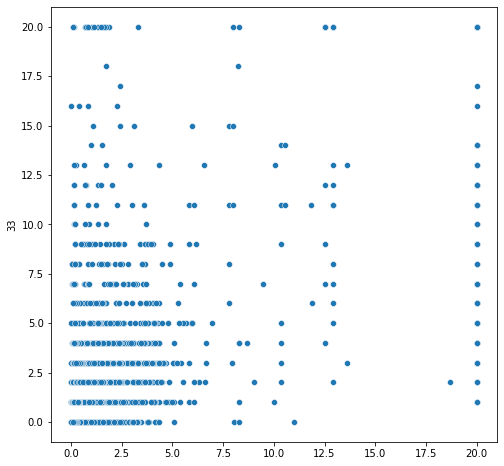

In [ ]:
pp = final_model.predict(x_meta_val).clip(0,20)
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=pp, y=y_val.clip(0,20))

In [ ]:
mean_squared_error(y_val.clip(0,20), pp)

0.8534447359059902

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


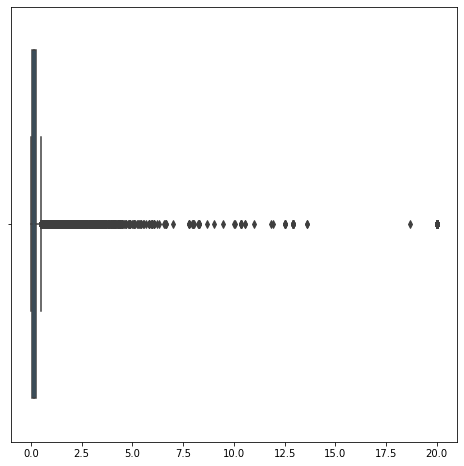

In [ ]:
sns.boxplot(pp)

In [ ]:
pred1 = final_model.predict(x_meta_test).clip(0,20)
ans = pd.DataFrame({'ID':[i for i in range(len(x_meta_test))], 'item_cnt_month':(pred + pred1)/2}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.274903
std,0.927763
min,0.000000
25%,0.031838
50%,0.131835
75%,0.226529
max,20.000000


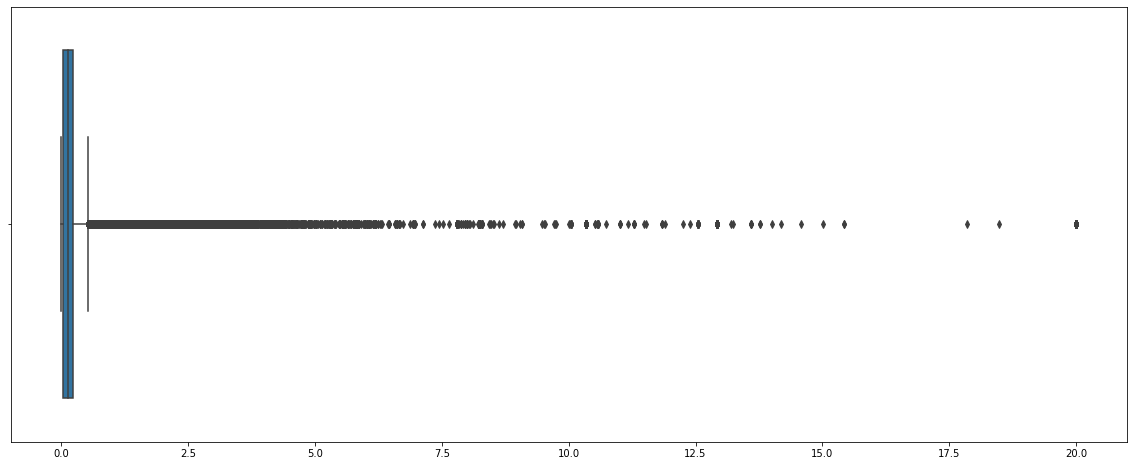

In [ ]:
plt.rcParams['figure.figsize']=(20,8)
sns.boxplot(x=pred)

In [ ]:
(pred ** 2).mean()

0.9363116403075178

In [ ]:
from google.colab import files
ans.to_csv('compans_ensemble_nc8.csv')
files.download('compans_ensemble_nc8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Linear Model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x_meta_p)
x_meta_pp = scaler.transform(x_meta_p)
x_meta_test_pp = scaler.transform(x_meta_test_p)
x_meta_test_pp

array([[2.07175117e-03, 0.00000000e+00, 2.81945877e-01, ...,
        3.50736916e-02, 2.23821472e-01, 1.33481765e-03],
       [1.32847426e-03, 0.00000000e+00, 9.75606439e-02, ...,
        3.40219969e-02, 2.22726478e-01, 4.42468272e-04],
       [2.74807783e-03, 1.00000000e+00, 6.19286076e-01, ...,
        3.57777277e-02, 2.24988542e-01, 1.86246529e-03],
       ...,
       [1.29635505e-03, 0.00000000e+00, 9.62251667e-02, ...,
        3.39512128e-02, 2.22397975e-01, 4.37685631e-04],
       [1.25107878e-03, 0.00000000e+00, 5.08934601e-02, ...,
        3.39301581e-02, 2.22433228e-01, 4.33818934e-04],
       [1.38098047e-03, 0.00000000e+00, 9.96177983e-02, ...,
        3.40426703e-02, 2.22720608e-01, 4.94153870e-04]])

In [ ]:
cb_max = max(l_train['catboost'].max(), l_val['catboost'].max(), l_test['catboost'].max())
cb_min = min(l_train['catboost'].min(), l_val['catboost'].min(), l_test['catboost'].min())

lb_max = max(l_train['LGBM'].max(), l_val['LGBM'].max(), l_test['LGBM'].max())
lb_min = min(l_train['LGBM'].min(), l_val['LGBM'].min(), l_test['LGBM'].min())

In [ ]:
def prepare(x):
    x['catboost'] = (x['catboost'] - cb_min) / (cb_max - cb_min)
    x['LGBM'] = (x['LGBM'] - lb_min) / (lb_max - lb_min)
    return x

In [ ]:
l_train = prepare(l_train)
l_test = prepare(l_test)
l_val = prepare(l_val)

In [ ]:
l_train.head()

,catboost,LGBM
0,0.001405,0.155345
1,0.001651,0.155548
2,0.001322,0.155251
3,0.001482,0.155514
4,0.001499,0.155519


In [ ]:
np.isfinite(l_train).mean()

catboost    1.0
LGBM        1.0
dtype: float64

In [ ]:
def build_l(x):
    x['cb^2'] = x['catboost']**2
    x['lg^2'] = x['LGBM']**2
    x['cb*lg'] = x['catboost'] * x['LGBM']
    x['ln_cb'] = np.log(x['catboost'] + 1)
    x['ln_lg'] = np.log(x['LGBM'] +1)

    return x

In [ ]:
l_train = build_l(l_train)
l_test = build_l(l_test)
l_val = build_l(l_val)

In [ ]:
l_test.head()

,catboost,LGBM,cb^2,lg^2,cb*lg,ln_cb,ln_lg
0,0.001942,0.156230,0.000004,0.024408,0.000303,0.001940,0.145165
1,0.001478,0.155404,0.000002,0.024150,0.000230,0.001477,0.144450
2,0.002472,0.157154,0.000006,0.024697,0.000389,0.002469,0.145963
3,0.001484,0.155499,0.000002,0.024180,0.000231,0.001483,0.144532
4,0.001993,0.155962,0.000004,0.024324,0.000311,0.001991,0.144933


In [ ]:
np.isfinite(l_train).mean()

catboost    1.0
LGBM        1.0
cb^2        1.0
lg^2        1.0
cb*lg       1.0
ln_cb       1.0
ln_lg       1.0
dtype: float64

In [ ]:
xt, xv, yt, yv = train_test_split(x_meta_pp, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=1)
lr.fit(x_meta_pp, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.0005)
lr.fit(xt, yt)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
ff = [x for x in x_meta_pp.columns]
f_i = pd.DataFrame({'Feature':ff, 'Coef':lr.coef_})
sns.barplot(x='Coef', y='Feature', data=f_i)

AttributeError: ignored

In [ ]:
lr.coef_

array([ 1.97924142e+02,  1.08264115e-02,  4.06962776e-03,  0.00000000e+00,
        3.22221261e-01,  3.20080684e+01,  0.00000000e+00,  0.00000000e+00,
        1.05664555e-01,  8.81497721e-04,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        8.47969937e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.25336648e+02,  4.95936669e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00])

In [ ]:
pppp = lr.predict(xv)
mean_squared_error(yv.clip(0,20), pppp.clip(0,20))

0.6706265365290938

In [ ]:
pppp = lr.predict(x_meta_pp)
mean_squared_error(y.clip(0,20), pppp.clip(0,20))

0.7334875023886853

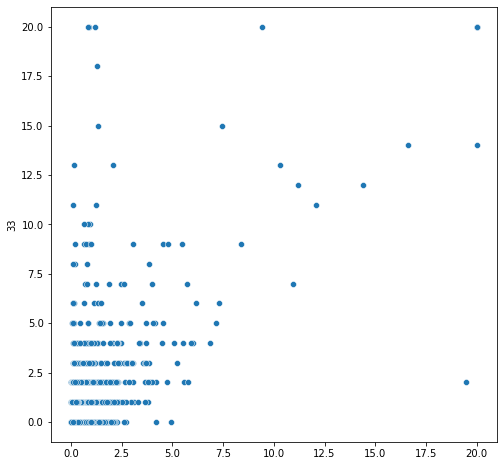

In [ ]:
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=pppp.clip(0,20), y=y_val_v.clip(0,20))

In [ ]:
prediction = lr.predict(x_meta_test_pp).clip(0,20)
ans = pd.DataFrame({'ID':[i for i in range(len(x))], 'item_cnt_month':(prediction*1 + pred*8)/9}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.263440
std,0.721690
min,0.000000
25%,0.055092
50%,0.124697
75%,0.220421
max,20.000000


In [ ]:
ans.to_csv('compans_ensemble_lasso00005_cat.csv')
files.download('compans_ensemble_lasso00005_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **CatBoost using meta and normal**

In [ ]:
x.loc[:,x_meta.columns] = x_meta
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,category_id,sub_cat_id,category_id_m,sub_cat_id_m,category_price,sub_cat_price,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c,cb_and_lb,cb_and_svc,lb_and_svc,cb_or_lb,cb_or_svc,lb_or_svc,catboost_r+lightgbm_r,catboost_r*lightgbm_r,catboost_r+svr,catboost_r*svr,lightgbm_r+catboost_r,lightgbm_r*catboost_r,lightgbm_r+svr,lightgbm_r*svr,svr+catboost_r,svr*catboost_r,svr+lightgbm_r,svr*lightgbm_r,std,mean,min,max
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,19,5,0.304632,0.308253,1505.534278,1100.428753,0.567992,0,0.377065,0.570339,0.271520,0.422060,0,0,0,0,0,0,0,0,1.138330,0.323948,0.990052,0.239727,1.138330,0.323948,0.992399,0.240717,0.990052,0.239727,0.992399,0.240717,0.084939,0.520130,0.422060,0.570339
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.304632,0.308253,286.209370,354.504568,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0,0,0,0,0,0,0,0.284423,0.020208,0.292850,0.021440,0.284423,0.020208,0.284769,0.020256,0.292850,0.021440,0.284769,0.020256,0.004769,0.143674,0.138171,0.146598
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,19,5,0.000000,0.000000,1505.534278,1100.428753,1.009574,1,0.765259,0.967530,0.193471,0.494234,0,0,0,0,0,1,1,0,1.977105,0.976794,1.503809,0.498966,1.977105,0.976794,1.461764,0.478186,1.503809,0.498966,1.461764,0.478186,0.286168,0.823780,0.494234,1.009574
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23,5,0.304632,0.500000,1470.959494,1100.428753,0.165679,0,0.171649,0.198141,0.148377,0.143644,0,0,0,0,0,0,0,0,0.363819,0.032828,0.309323,0.023799,0.363819,0.032828,0.341785,0.028462,0.309323,0.023799,0.341785,0.028462,0.027414,0.169155,0.143644,0.198141
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,0.304632,0.333333,2693.714838,1100.428753,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0,0,0,0,0,0,0,0.728634,0.130941,0.501355,0.038534,0.728634,0.130941,0.416831,0.030523,0.501355,0.038534,0.416831,0.030523,0.161256,0.274470,0.094776,0.406579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.201013,0.147640,286.209370,354.504568,0.166705,0,0.160874,0.172948,0.181850,0.177077,0,0,0,0,0,0,0,0,0.339653,0.028831,0.343783,0.029520,0.339653,0.028831,0.350026,0.030625,0.343783,0.029520,0.350026,0.030625,0.005222,0.172244,0.166705,0.177077
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,10,0.154233,0.285483,1025.512627,729.792312,0.064920,0,0.046422,0.081575,0.043879,0.109558,0,0,0,0,0,0,0,0,0.146495,0.005296,0.174478,0.007113,0.146495,0.005296,0.191133,0.008937,0.174478,0.007113,0.191133,0.008937,0.022557,0.085351,0.064920,0.109558
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.201042,0.147659,286.209370,354.504568,0.133917,0,0.092533,0.107414,0.074847,0.176138,0,0,0,0,0,0,0,0,0.241331,0.014385,0.310055,0.023588,0.241331,0.014385,0.283552,0.018920,0.310055,0.023588,0.283552,0.018920,0.034660,0.139156,0.107414,0.176138
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
x_test[x_meta_test.columns] = x_meta_test
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,category_id,sub_cat_id,category_id_m,sub_cat_id_m,category_price,sub_cat_price,catboost_r,catboost_c,catboost_pr,lightgbm_r,lightgbm_pr,svr,svc,lightgbm_c,cb_and_lb,cb_and_svc,lb_and_svc,cb_or_lb,cb_or_svc,lb_or_svc,catboost_r+lightgbm_r,catboost_r*lightgbm_r,catboost_r+svr,catboost_r*svr,lightgbm_r+catboost_r,lightgbm_r*catboost_r,lightgbm_r+svr,lightgbm_r*svr,svr+catboost_r,svr*catboost_r,svr+lightgbm_r,svr*lightgbm_r,std,mean,min,max
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0,19,5,0.304632,0.308253,1505.534278,1100.428753,0.442340,0,0.282669,0.501753,0.272377,0.263368,0,0,0,0,0,0,0,0,0.944093,0.221946,0.705709,0.116498,0.944093,0.221946,0.765122,0.132146,0.705709,0.116498,0.765122,0.132146,0.124089,0.402487,0.263368,0.501753
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.304632,0.308253,286.209370,354.504568,0.146252,0,0.098480,0.138171,0.061008,0.146598,0,0,0,0,0,0,0,0,0.284423,0.020208,0.292850,0.021440,0.284423,0.020208,0.284769,0.020256,0.292850,0.021440,0.284769,0.020256,0.004769,0.143674,0.138171,0.146598
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0,19,5,0.000000,0.000000,1505.534278,1100.428753,0.711758,1,0.619652,0.618670,0.148504,0.396807,0,0,0,0,0,1,1,0,1.330428,0.440343,1.108565,0.282430,1.330428,0.440343,1.015477,0.245493,1.108565,0.282430,1.015477,0.245493,0.161804,0.575745,0.396807,0.711758
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23,5,0.304632,0.500000,1470.959494,1100.428753,0.120044,0,0.122643,0.163266,0.108354,0.109964,0,0,0,0,0,0,0,0,0.283310,0.019599,0.230008,0.013201,0.283310,0.019599,0.273230,0.017953,0.230008,0.013201,0.273230,0.017953,0.028316,0.131091,0.109964,0.163266
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,5,0.304632,0.333333,2693.714838,1100.428753,0.406579,0,0.077177,0.322055,0.039292,0.094776,0,0,0,0,0,0,0,0,0.728634,0.130941,0.501355,0.038534,0.728634,0.130941,0.416831,0.030523,0.501355,0.038534,0.416831,0.030523,0.161256,0.274470,0.094776,0.406579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55,9,0.201013,0.147640,286.209370,354.504568,0.268892,0,0.205317,0.279779,0.160567,0.256015,0,0,0,0,0,0,0,0,0.548671,0.075230,0.524907,0.068841,0.548671,0.075230,0.535795,0.071628,0.524907,0.068841,0.535795,0.071628,0.011896,0.268229,0.256015,0.279779
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,10,0.154233,0.285483,1025.512627,729.792312,0.064920,0,0.046422,0.081575,0.043879,0.109558,0,0,0,0,0,0,0,0,0.146495,0.005296,0.174478,0.007113,0.146495,0.005296,0.191133,0.008937,0.174478,0.007113,0.191133,0.008937,0.022557,0.085351,0.064920,0.109558
214197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55,9,0.201042,0.147659,286.209370,354.504568,0.133458,0,0.097146,0.100611,0.101034,0.144694,0,0,0,0,0,0,0,0,0.234069,0.013427,0.278152,0.019311,0.234069,0.013427,0.245305,0.014558,0.278152,0.019311,0.245305,0.014558,0.022907,0.126254,0.100611,0.144694
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2)

In [ ]:
c_model = CatBoostRegressor(objective='RMSE', learning_rate=0.03, reg_lambda=4, n_estimators=650, max_depth=12, random_state=0)
c_model.fit(x, y, verbose=True,cat_features=cat_feat)

0:	learn: 2.6325711	total: 548ms	remaining: 5m 55s
1:	learn: 2.6008210	total: 1.04s	remaining: 5m 38s
2:	learn: 2.5707715	total: 1.59s	remaining: 5m 42s
3:	learn: 2.5416294	total: 2.1s	remaining: 5m 39s
4:	learn: 2.5123954	total: 2.63s	remaining: 5m 39s
5:	learn: 2.4847233	total: 3.12s	remaining: 5m 34s
6:	learn: 2.4575685	total: 3.64s	remaining: 5m 34s
7:	learn: 2.4302139	total: 4.16s	remaining: 5m 33s
8:	learn: 2.4029874	total: 4.68s	remaining: 5m 33s
9:	learn: 2.3744003	total: 5.24s	remaining: 5m 35s
10:	learn: 2.3488060	total: 5.75s	remaining: 5m 34s
11:	learn: 2.3243060	total: 6.28s	remaining: 5m 33s
12:	learn: 2.2996501	total: 6.81s	remaining: 5m 33s
13:	learn: 2.2753731	total: 7.33s	remaining: 5m 33s
14:	learn: 2.2521195	total: 7.85s	remaining: 5m 32s
15:	learn: 2.2296716	total: 8.38s	remaining: 5m 32s
16:	learn: 2.2050659	total: 8.88s	remaining: 5m 30s
17:	learn: 2.1809896	total: 9.38s	remaining: 5m 29s
18:	learn: 2.1575737	total: 9.91s	remaining: 5m 29s
19:	learn: 2.1446698	to

In [ ]:
predictions = c_model.predict(x_test).clip(0,20)
ans = pd.DataFrame({'ID':[i for i in range(len(x_test))], 'item_cnt_month':predictions}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.260011
std,0.690749
min,0.000000
25%,0.055892
50%,0.127601
75%,0.232568
max,20.000000


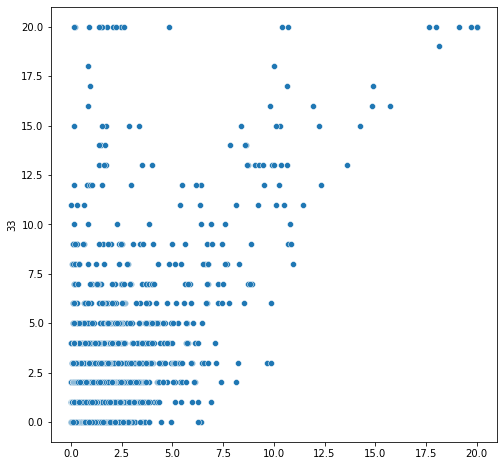

In [ ]:
sns.scatterplot(y=y_val.clip(0,20), x=c_model.predict(x_val).clip(0,20))

In [ ]:
ans.to_csv('compans_ensembe_feat_full.csv')
files.download('compans_ensembe_feat_full.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **DT Regressor**

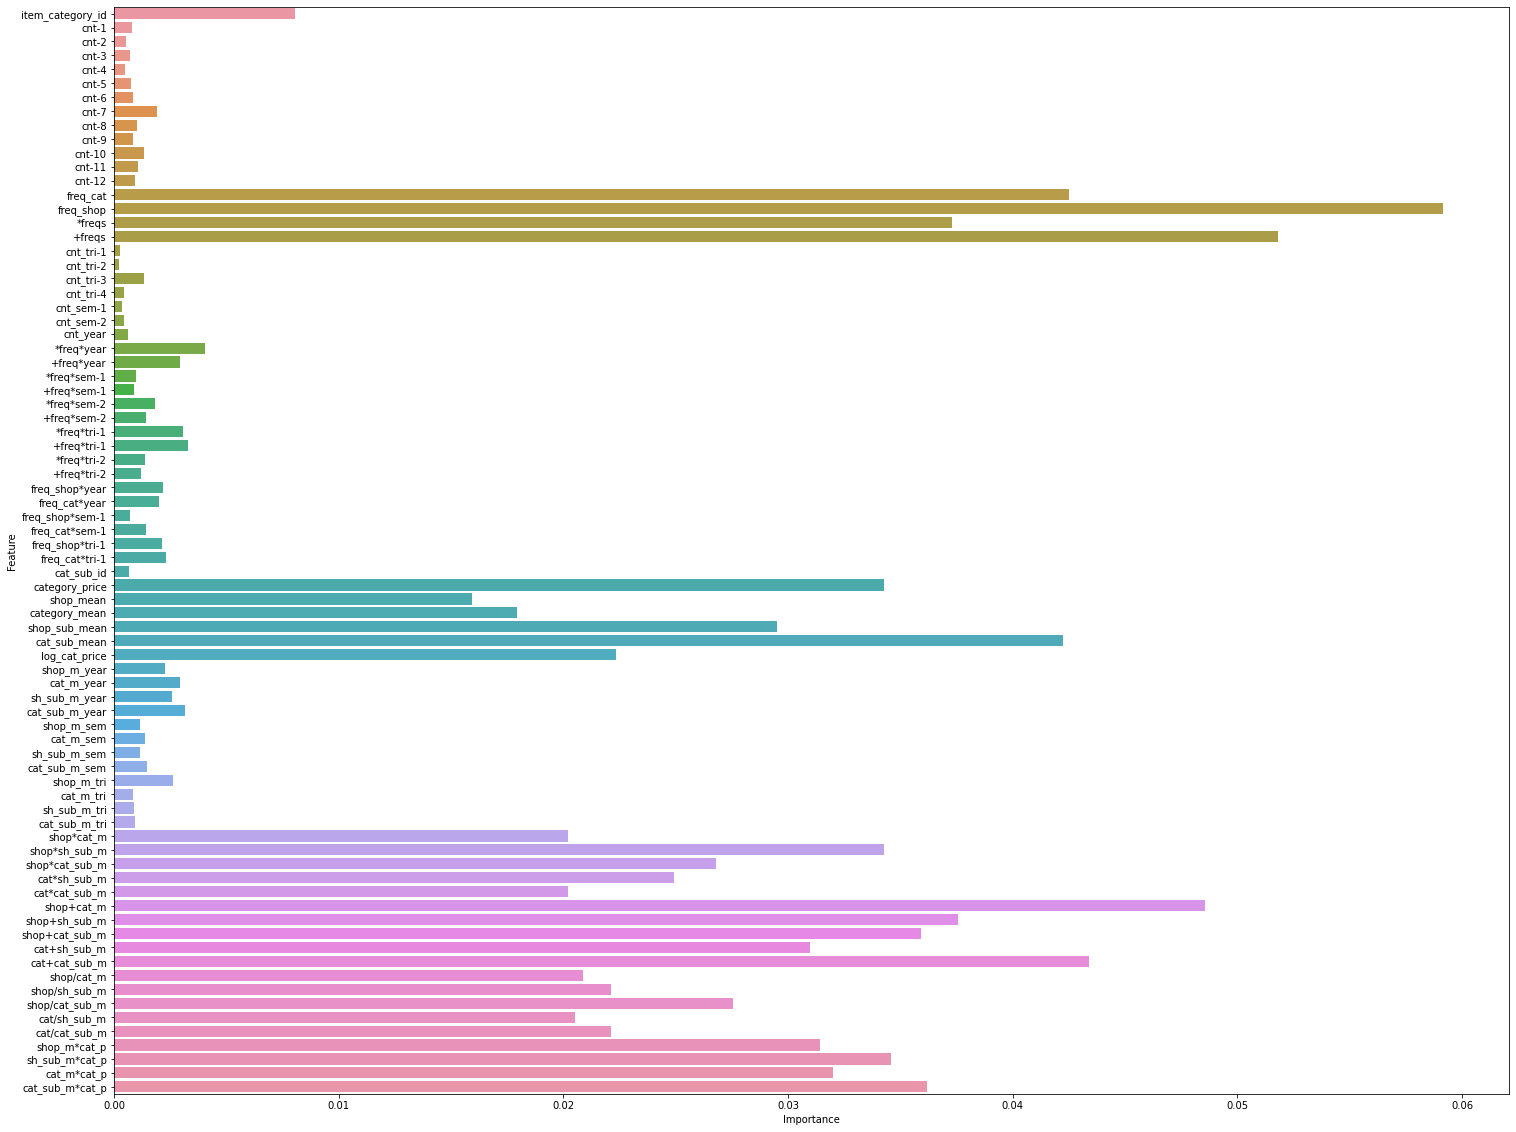

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor(n_estimators=10)
dt.fit(x_val, y_val)
f_i = pd.DataFrame({'Feature':x_val.columns, 'Importance':dt.feature_importances_})
plt.rcParams['figure.figsize']=(20,25)
sns.barplot(x='Importance', y='Feature', data=f_i)

# **LGBM**

In [ ]:
y_train = y_train.clip(-15, 800)
y_val = y_val.clip(-15, 800)

In [ ]:
import lightgbm as lgb

model = None
params = {'n_estimators':200, 'objective':'mse', 'learning_rate':0.01, 'num_leaves':7, 'metric':['mse'],
          'reg_alpha':0.2, 'reg_lambda':0.2, 'max_depth':5, 'min_split_gain':0.02, 'min_child_weight':200}
cat_feat = ['item_category_id', 'cat_sub_id']
l = int(len(y_train)/10)

val = lgb.Dataset(x_val, y_val, free_raw_data=False)

for i in range(1,21):
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    print('Epoch: ' + str(i))

    j = i % 10
    if j == 0:
        j = 10 
    train = lgb.Dataset(x_train.iloc[(j-1)*l:j*l], y_train.iloc[(j-1)*l:j*l])

    model = lgb.train(params, train, verbose_eval=20, valid_sets=val, init_model=model,
                      categorical_feature=cat_feat, early_stopping_rounds=50, num_boost_round=200, keep_training_booster=True)


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 1


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['cat_sub_id', 'item_category_id']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 50 rounds.
[20]	valid_0's l2: 0.33092
[40]	valid_0's l2: 0.334846
Early stopping, best iteration is:
[1]	valid_0's l2: 0.329353
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 2
Training until validation scores don't improve for 50 rounds.
[60]	valid_0's l2: 0.338147
[80]	valid_0's l2: 0.33917
[100]	valid_0's l2: 0.340533
Early stopping, best iteration is:
[52]	valid_0's l2: 0.337925
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 3


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:814: UserWarning: The prediction of init_model will be overridden by init_score.
  warnings.warn("The prediction of init_model will be overridden by init_score.")


Training until validation scores don't improve for 50 rounds.
[120]	valid_0's l2: 0.335465
[140]	valid_0's l2: 0.333961
[160]	valid_0's l2: 0.333345
[180]	valid_0's l2: 0.333152
[200]	valid_0's l2: 0.33316
[220]	valid_0's l2: 0.333259
[240]	valid_0's l2: 0.333401
Early stopping, best iteration is:
[192]	valid_0's l2: 0.333137
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 4
Training until validation scores don't improve for 50 rounds.
[260]	valid_0's l2: 0.337825
[280]	valid_0's l2: 0.338502
[300]	valid_0's l2: 0.339691
Early stopping, best iteration is:
[254]	valid_0's l2: 0.337799
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 5
Training until validation scores don't improve for 50 rounds.
[320]	valid_0's l2: 0.338019
[340]	valid_0's l2: 0.338327
Early stopping, best iteration is:
[306]	valid_0's l2: 0.337909
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Epoch: 6

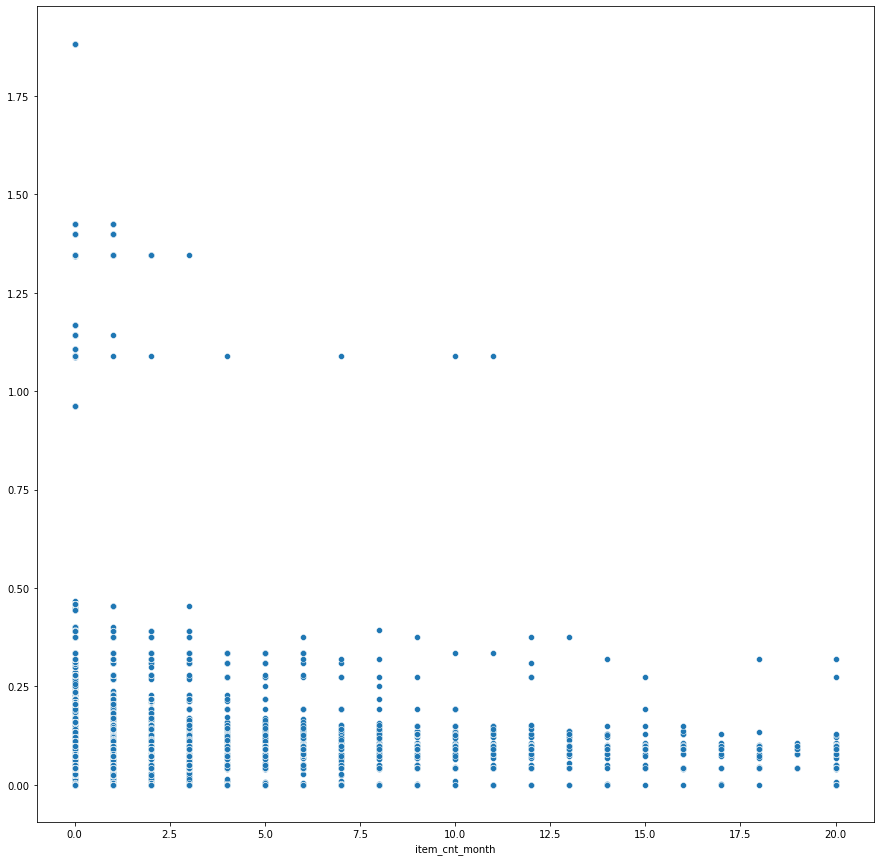

In [ ]:
ppp = model.predict(x_train.iloc[-1000000:]).clip(0,20)
sns.scatterplot(x=y_val.iloc[-1000000:].clip(0,20), y=ppp)

In [ ]:
prediction = (model.predict(test))
prediction = prediction
ans = pd.DataFrame({'ID':[i for i in range(len(test))], 'item_cnt_month':prediction}).set_index('ID')
ans.describe()

,item_cnt_month
count,214200.000000
mean,0.065913
std,0.077561
min,-0.308997
25%,0.040588
50%,0.052892
75%,0.073299
max,2.613003


In [ ]:
ans.iloc[np.random.permutation(len(test))[15:]].head(15)

,item_cnt_month
ID,
182470,0.054357
168749,0.064156
141350,0.000000
148428,0.048543
96673,0.049343
71704,0.024990
14612,0.059281
12722,0.019890
113380,0.093018


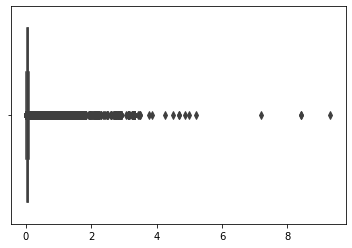

In [ ]:
sns.boxplot(x=prediction.clip(0,20))

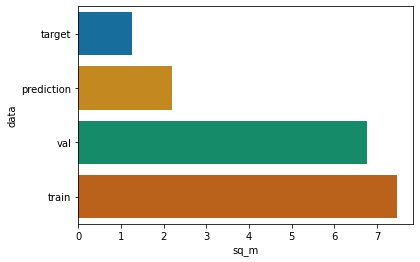

In [ ]:
mm = pd.DataFrame({'sq_m':[1.25, (prediction**2).mean(), (y_val**2).mean(), (y_train.clip(0,20)**2).mean()],
                   'data':['target','prediction', 'val', 'train']})
sns.barplot(x='sq_m', y='data', data=mm, palette='colorblind')


In [ ]:
ans.to_csv('compans_lgb_lastm.csv')
from google.colab import files
files.download('compans_lgb_lastm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
(prediction**2).mean()

2.642464664451317